In [1]:

from stockfish import Stockfish
import chess
from feature_engineering import process_pgn_file, extract_features
from collections import defaultdict, Counter
import chess.pgn
import pandas as pd

In [22]:
games_without = []
pgn_file = open("data/FIDE_t.pgn", encoding='utf-8')
game = chess.pgn.read_game(pgn_file)

while game is not None:
    # Read the next game

    features = defaultdict(int)
    features["event"] = game.headers.get('Event', '')
    features["round"] = game.headers.get('Round', '')
    features["white"] = game.headers.get('White', '')
    features["black"] = game.headers.get('Black', '')
    features["result"] = game.headers.get('Result', '')
    features["moves"] = [str(move) for move in game.mainline_moves()]
    features["white_elo"] = game.headers.get('WhiteElo', '')
    features["black_elo"] = game.headers.get('BlackElo', '')
    game = chess.pgn.read_game(pgn_file)
    games_without.append(features)


pgn_file.close()

In [23]:
games_with = []
pgn_file = open("data/FIDE_new.pgn")
game = chess.pgn.read_game(pgn_file)

while game is not None:
    # Read the next game

    features = defaultdict(int)
    features["event"] = game.headers.get('Event', '')
    features["round"] = game.headers.get('Round', '')
    features["white"] = game.headers.get('White', '')
    features["black"] = game.headers.get('Black', '')
    features["result"] = game.headers.get('Result', '')
    features["moves"] = [str(move) for move in game.mainline_moves()]
    features["white_elo"] = game.headers.get('WhiteElo', '')
    features["black_elo"] = game.headers.get('BlackElo', '')
    game = chess.pgn.read_game(pgn_file)
    games_with.append(features)


pgn_file.close()

In [25]:
df_without = pd.DataFrame(games_without)
df_with = pd.DataFrame(games_with)

print(len(df_without))
print(len(df_with))

32436
39950


In [18]:
df_without.head()

,event,round,white,black,result,moves,white_elo,black_elo
0,FIDE Online Olympiad for people with disabilities,1.1,"Tran, Thi Bich Thuy","Zhukovskaya, Nina",1-0,"[d2d4, g8f6, c1g5, d7d6, g5f6, g7f6, e2e3, e7e...",1422,1475
1,FIDE Online Olympiad for people with disabilities,1.1.1,"Molenda, Marcin","Alam, Md. Khorshed",1-0,"[d2d4, d7d5, c2c4, c7c6, g1f3, g8f6, d1b3, d8b...",2349,2065
2,FIDE Online Olympiad for people with disabilities,1.1.2,"Husain, Ejaz","Nowak, Lukasz",0-1,"[e2e4, c7c5, g1f3, d7d6, c2c3, g8f6, f1e2, c8d...",1952,2265
3,FIDE Online Olympiad for people with disabilities,1.1.3,"Choroszej, Aleksander","Sarkar, Bappi",1-0,"[d2d4, d7d5, c2c4, e7e6, b1c3, g8f6, g1f3, f8e...",2042,1808
4,FIDE Online Olympiad for people with disabilities,1.1.4,"Marufa Azad, Sukanna","Jakimczuk, Alicja",0-1,"[e2e4, d7d5, g1f3, d5e4, f3g5, g8f6, d2d3, e4d...",1164,1314


In [17]:
df_with.head()

,event,round,white,black,result,moves,white_elo,black_elo
0,FIDE Online Olympiad for people with disabilities,1.1,"Tran, Thi Bich Thuy","Zhukovskaya, Nina",1-0,"[d2d4, g8f6, c1g5, d7d6, g5f6, g7f6, e2e3, e7e...",1422,1475
1,FIDE Online Olympiad for people with disabilities,1.1.1,"Molenda, Marcin","Alam, Md. Khorshed",1-0,"[d2d4, d7d5, c2c4, c7c6, g1f3, g8f6, d1b3, d8b...",2349,2065
2,FIDE Online Olympiad for people with disabilities,1.1.2,"Husain, Ejaz","Nowak, Lukasz",0-1,"[e2e4, c7c5, g1f3, d7d6, c2c3, g8f6, f1e2, c8d...",1952,2265
3,FIDE Online Olympiad for people with disabilities,1.1.3,"Choroszej, Aleksander","Sarkar, Bappi",1-0,"[d2d4, d7d5, c2c4, e7e6, b1c3, g8f6, g1f3, f8e...",2042,1808
4,FIDE Online Olympiad for people with disabilities,1.1.4,"Marufa Azad, Sukanna","Jakimczuk, Alicja",0-1,"[e2e4, d7d5, g1f3, d5e4, f3g5, g8f6, d2d3, e4d...",1164,1314


In [28]:
df_without = df_without[df_without['moves'].apply(lambda x: len(x) >= 6)]
df_with = df_with[df_with['moves'].apply(lambda x: len(x) >= 6)]
print(len(df_with))
print(len(df_without))


30001
30001


In [32]:
with open("data/FIDE_t.pgn", "r", encoding='utf-8') as file1, open("data/FIDE.pgn", "r", encoding='utf-16') as file2:
    file1_lines = file1.readlines()
    file2_lines = file2.readlines()
count = 0
# Compare line by line
for line1, line2 in zip(file1_lines, file2_lines):
    count+=1
    if line1 != line2:
        print(f"Difference found:\nFile1: {line1}\nFile2: {line2}")
        print(count)
        break

Difference found:
File1: [Black "Júnior, Ednasia"]

File2: [Black "JÃºnior, Ednasia"]

20967


In [20]:
import os

"""
In this file, I combine all the FIDE PGN files into one big PGN file.
"""

# Specify the directory containing the PGN files
folder_path = 'data/FIDE_ONLY_PGN'
output_file = 'data/FIDE_t.pgn'

# Ensure the output directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)
not_first_file = False
# Open the output file in write mode with UTF-8 encoding
with open(output_file, 'w', encoding='utf-8') as outfile:
    # Loop through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pgn'):
            file_path = os.path.join(folder_path, file_name)
            
            if not_first_file: outfile.write('\n')
            else: not_first_file = True
            
            # Open and read each PGN file with UTF-8 encoding
            with open(file_path, 'r', encoding='utf-8') as infile:
                content = infile.read().rstrip()  # Remove any trailing newlines
                outfile.write(content)
                outfile.write('\n\n')  # Ensure only one blank line between games

print(f"All FIDE PGN files have been combined into {output_file}")

All FIDE PGN files have been combined into data/FIDE_t.pgn


In [21]:
!pgn-extract -e data/FIDE_t.pgn --output data/FIDE_new.pgn

Processing eco.pgn
Processing data/FIDE_t.pgn
Tran, Thi Bich Thuy - Zhukovskaya, Nina FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Molenda, Marcin - Alam, Md. Khorshed FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Husain, Ejaz - Nowak, Lukasz FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Choroszej, Aleksander - Sarkar, Bappi FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Marufa Azad, Sukanna - Jakimczuk, Alicja FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Nuserova, Almash - Duong, Hien Vuong FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Atabayev, Aydogdy - Eichstaedt, Mirko FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Becker, Michael - Bashymow, Oraz FIDE Online Olympiad for people with disabilities Tornelo INT 2020.11.22 
Amangeldiyev, Meredgeldy - Dorner, Matthias FIDE Online Olympiad for 

In [8]:
path = "Romeusand_vs_jinv3_2024.08.29.pgn"
games = process_pgn_file(path, 50000)
game = games[0]

In [9]:
out = extract_features(game)

In [11]:
print(out["white"])
out["white_cpl"]

[80, 80, 108, 108, 63, 63, 107, 107, 105, 105, 118, 118, 56, 56, 102, 102, 95, 95, 100, 100, 104, 104, 146, 146, 108, 108, 189, 189, 187, 187, 179, 179, 160, 160, 343, 343, 367, 367, 505, 505, 415, 415, 451, 451, 456, 456, 457, 457, 447, 447, 458, 458, 407, 407, 525, 525, 549, 549, 608, 608, 600, 600, 1, 1, 0, 0]


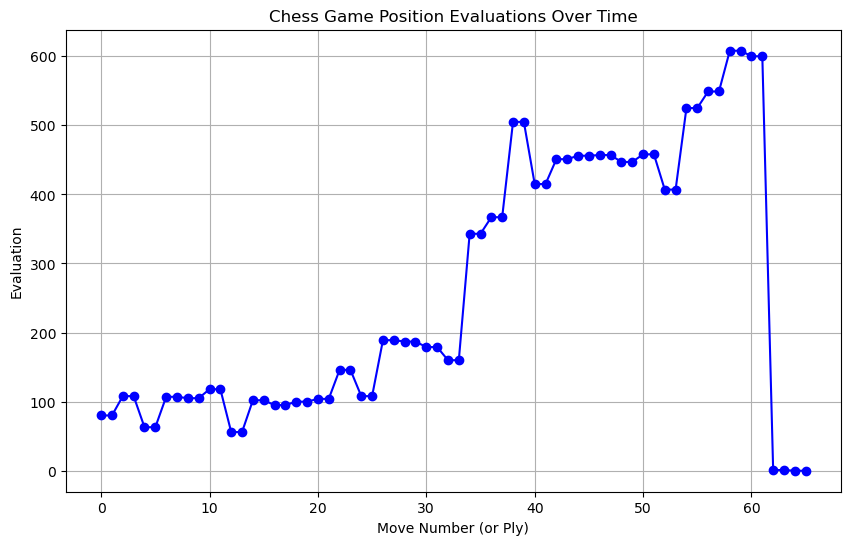

In [12]:
import matplotlib.pyplot as plt


# Plot the evaluations
plt.figure(figsize=(10, 6))
plt.plot(out["stockfish_eval"], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Chess Game Position Evaluations Over Time')
plt.xlabel('Move Number (or Ply)')
plt.ylabel('Evaluation')
plt.grid(True)

# Show the plot
plt.show()

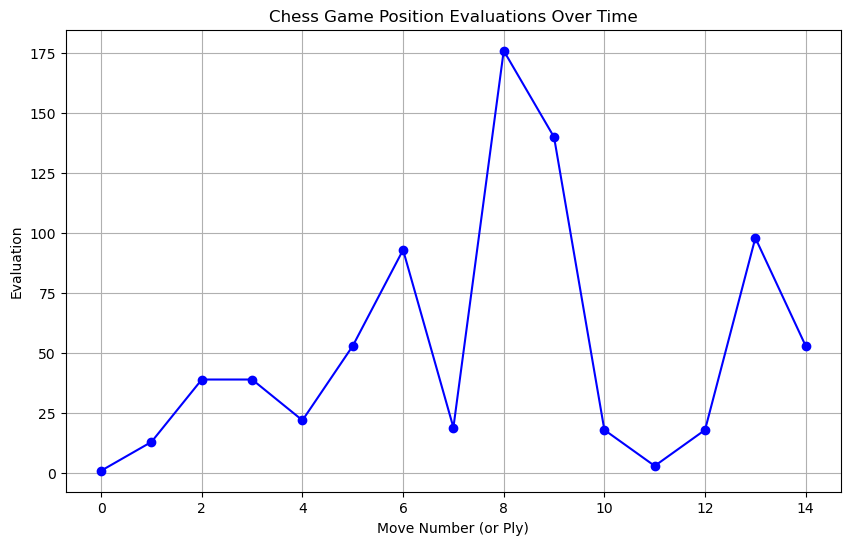

In [14]:
import matplotlib.pyplot as plt


# Plot the evaluations
plt.figure(figsize=(10, 6))
plt.plot(out["black_cpl"], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Chess Game Position Evaluations Over Time')
plt.xlabel('Move Number (or Ply)')
plt.ylabel('Evaluation')
plt.grid(True)

# Show the plot
plt.show()